# Importar dados e pacotes essenciais

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
#from pandas_profiling import ProfileReport
%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
from ydata_profiling import ProfileReport

In [3]:
df = pd.read_csv("data/credit_default.csv")

In [4]:
df.columns

Index(['id', 'year', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'upfront_charges', 'term', 'property_value', 'construction_type',
       'income', 'credit_type', 'credit_score', 'age', 'ltv', 'region',
       'status'],
      dtype='object')

In [5]:
# para simplicidade vamos colocar os nomes das colunas em minusculas
df.columns = [col.lower() for col in df.columns]

In [6]:
# ver 1a linha do dataset
df.head(1)

id  year             gender approv_in_adv loan_type loan_purpose  \
0  24890  2019  Sex Not Available         nopre     type1           p1   

  business_or_commercial  loan_amount  rate_of_interest  upfront_charges  \
0                  nob/c       116500               NaN              NaN   

    term  property_value construction_type  income credit_type  credit_score  \
0  360.0        118000.0                sb  1740.0         EXP           758   

     age        ltv region  status  
0  25-34  98.728814  south       1

In [7]:
#dimensão do dataset: (nr linhas, nr colunas)
df.shape

(148670, 20)

##### $\color{red}{\text{Não esquecer que antes de avançar é importante conhecer o significado de cada variável!}}$
###### $\color{red}{\text{Neste caso ver excel "metadata"!}}$

# Tipos de dados

In [8]:
df.dtypes

id                          int64
year                        int64
gender                     object
approv_in_adv              object
loan_type                  object
loan_purpose               object
business_or_commercial     object
loan_amount                 int64
rate_of_interest          float64
upfront_charges           float64
term                      float64
property_value            float64
construction_type          object
income                    float64
credit_type                object
credit_score                int64
age                        object
ltv                       float64
region                     object
status                      int64
dtype: object

***Algumas observações:***
- o formato das variáveis term e status deve ser trocado para string;
- os restantes formatos parecem estar coerentes;
- para efeitos de exercicio vamos ver como mudar o formato da variável year para datetime;

In [9]:
#mudar para string
df['term'] = df.term.astype(str)
df['status'] = df.status.astype(str)

In [10]:
# mudar para date
df['year_date'] = pd.to_datetime(df.year, format='%Y')

In [11]:
#mudar para numeric (não há necessidade de criar variável nova)
df.term.astype('float64').head(1)

0    360.0
Name: term, dtype: float64

In [12]:
df.describe(datetime_is_numeric=True)

id      year   loan_amount  rate_of_interest  \
count  148670.000000  148670.0  1.486700e+05     112231.000000   
mean    99224.500000    2019.0  3.311177e+05          4.045476   
min     24890.000000    2019.0  1.650000e+04          0.000000   
25%     62057.250000    2019.0  1.965000e+05          3.625000   
50%     99224.500000    2019.0  2.965000e+05          3.990000   
75%    136391.750000    2019.0  4.365000e+05          4.375000   
max    173559.000000    2019.0  3.576500e+06          8.000000   
std     42917.476598       0.0  1.839093e+05          0.561391   

       upfront_charges  property_value         income   credit_score  \
count    109028.000000    1.335720e+05  139520.000000  148670.000000   
mean       3224.996127    4.978935e+05    6957.338876     699.789103   
min           0.000000    8.000000e+03       0.000000     500.000000   
25%         581.490000    2.680000e+05    3720.000000     599.000000   
50%        2596.450000    4.180000e+05    5760.000000     699.000000   
75%        4812.500000    6.280000e+05    8520.000000     800.000000   
max       60000.000000    1.650800e+07  578580.000000     900.000000   
std        3251.121510    3.599353e+05    6496.586382     115.875857   

                 ltv            year_date  
count  133572.000000               148670  
mean       72.746457  2019-01-01 00:00:00  
min         0.967478  2019-01-01 00:00:00  
25%        60.474860  2019-01-01 00:00:00  
50%        75.135870  2019-01-01 00:00:00  
75%        86.184211  2019-01-01 00:00:00  
max      7831.250000  2019-01-01 00:00:00  
std        39.967603                  NaN

***Algumas observações:***
- com este código conseguimos ver algumas estatísticas das variáveis numérias + datetime;
- esta primeira visão pode alertar para alguma falta de qualidade de dados;
- a variável id não é muito relevante para a nossa exploração -> drop;
- a variável year tem apenas 1 valor -> drop;
- pelo comparativo entre o (min, max) com o (25%, 75%) conseguimos ter uma primeira ideia sobre variáveis com outliers; 
- pelo count conseguimos já perceber se temos missing values;

In [13]:
df.describe(include=[object])

gender approv_in_adv loan_type loan_purpose business_or_commercial  \
count   148670        147762    148670       148536                 148670   
unique       4             2         3            4                      2   
top       Male         nopre     type1           p3                  nob/c   
freq     42346        124621    113173        55934                 127908   

          term construction_type credit_type     age  region  status  
count   148670            148670      148670  148470  148670  148670  
unique      27                 2           4       7       4       2  
top      360.0                sb         CIB   45-54   North       0  
freq    121685            148637       48152   34720   74722  112031

Observações semelhantes podem ser feitas aqui!

In [14]:
# remover colunas
df.drop(columns=["id", "year", "year_date"], inplace=True)

# Rápido relatório sobre os dados

In [15]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [16]:
%%time
#profile.to_file("reports/EDA.html")
profile

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 11.7 µs


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
profile.to_file("Analysis.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Estudo de ouliers
- Para este estudo vou propor separamos aleatoriamente o dataset inicial em 2
- Vamos estudar os outliers em apenas 1 deles e aplicar alterações em ambos
- Assim ficam a saber como proceder quando receberem dados novos

In [18]:
#separação aleatória em 70%/30%;
#random_state servirá para garantirmos que a divisão é a mesma quando corrermos o código outra vez
df1, df2 = train_test_split(df, test_size=0.3, random_state=0)

In [19]:
df1.shape

(104069, 18)

In [20]:
df2.shape

(44601, 18)

In [21]:
#selecionar automaticamente variáveis numericas
df_num = df1._get_numeric_data()

In [22]:
df_num.head(1)

loan_amount  rate_of_interest  upfront_charges  property_value  income  \
61856       216500              2.99          5548.89        308000.0  4440.0   

       credit_score        ltv  
61856           768  70.292208

In [23]:
# função para criar boxplots de todas as variáveis de uma dada dataframe
def plot_box_plots(df, fig_size = (12, 20)):
    """
    df: dataframe with only numerical variables
    fig_size: size of each sub plot
    output: box plots of each variable
    """
    
    #create structure
    fig, axes = plt.subplots(math.ceil(len(df.columns) / 3), 3, figsize = fig_size)

    #iteration by column
    for i, ax in enumerate(fig.axes):
        if i < len(df.columns):
            sns.boxplot(x=df.columns[i], data=df, ax=ax)
    
    # choose when hide figure
    if round((len(df.columns) / 3) % 1, 2) == 0.33:
        axes.flat[-2].set_visible(False)
        axes.flat[-1].set_visible(False)
    elif round((len(df.columns) / 3) % 1, 2) == 0.67:
        axes.flat[-1].set_visible(False)
    else:
        pass
    
    fig.tight_layout()

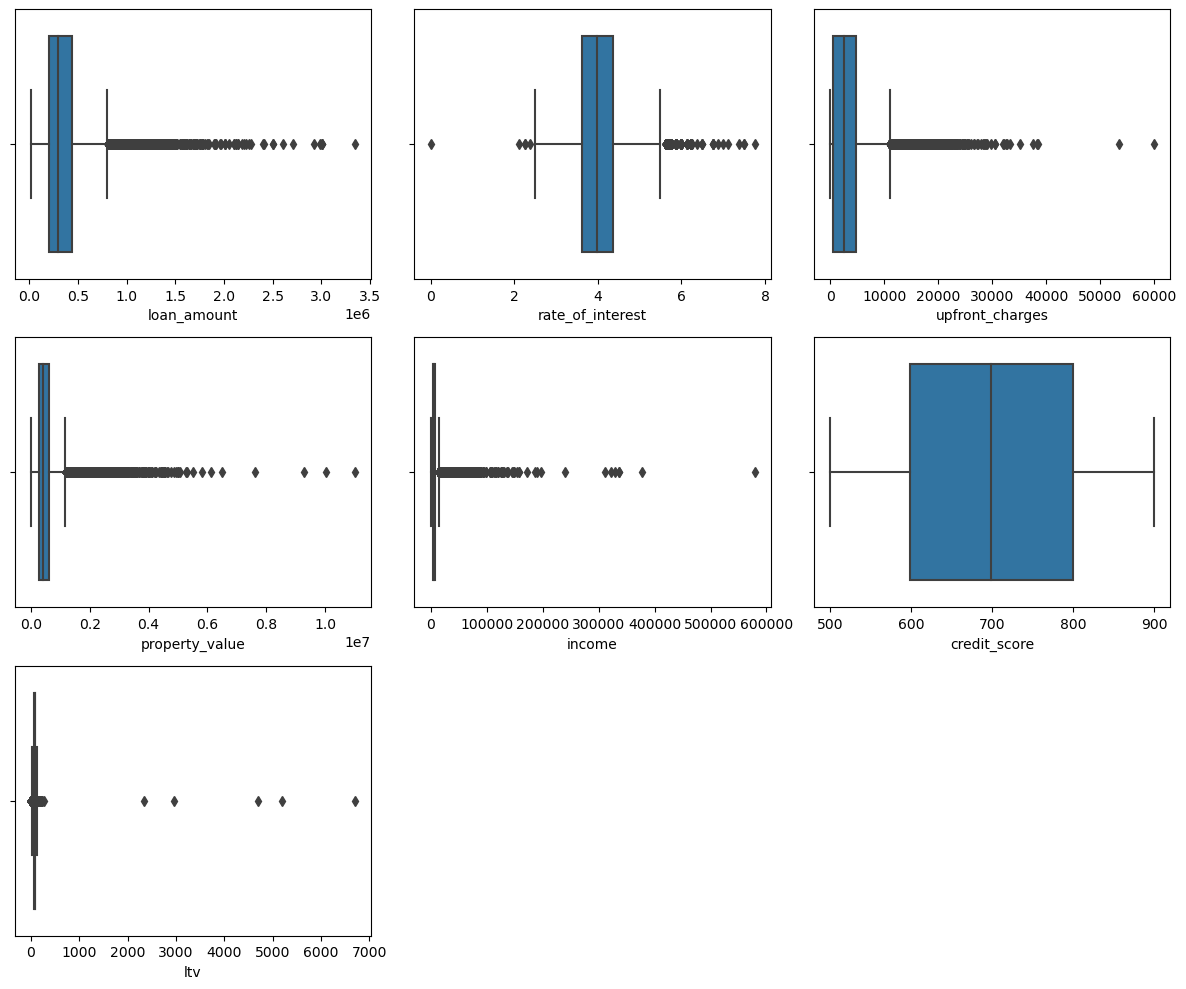

In [24]:
plot_box_plots(df_num, (12, 10))

***Algumas observações:***
- loan_amount: é possível alguém fazer um emprestimo de 3M€, portanto vamos manter estes outliers;
- rate_of_interest: todos estes valores são possíveis, mas devemos validar com o negócio se, por exemplo, queremos manter no estudo casos com 0%;
- upfront_charges: todos estes valores são possíveis;
- property value: todos estes valores são possíveis;
- income: vamos utilizar para exemplo o limite máximo para outliers severos;
- ltv: variável calculada, validar com negócio se querem manter todos os casos em estudo;

In [25]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

In [26]:
# limites inferiores para outliers severos 
lim_inf = dict(Q1-3*IQR)
lim_inf

{'loan_amount': -523500.0,
 'rate_of_interest': 1.375,
 'upfront_charges': -12074.855000000001,
 'property_value': -812000.0,
 'income': -10680.0,
 'credit_score': -4.0,
 'ltv': -16.91752293000001}

In [27]:
# limites superiores para outliers severos 
lim_sup = dict(Q3+3*IQR)
lim_sup

{'loan_amount': 1156500.0,
 'rate_of_interest': 6.625,
 'upfront_charges': 17460.2975,
 'property_value': 1708000.0,
 'income': 22920.0,
 'credit_score': 1403.0,
 'ltv': 163.66470470000002}

## tratamento

In [28]:
df1['outlier_income'] = np.where(df1.income >= lim_sup['income'], 1, 0)
df1['outlier_income'] = df1['outlier_income'].astype(str)
df1.loc[df1.income >= lim_sup['income'], 'income'] = lim_sup['income']

In [29]:
#aplicar o mesmo tratamento em novos dados (sabendo que os limites podem ter mudado)
df2['outlier_income'] = np.where(df2.income >= lim_sup['income'], 1, 0)
df2['outlier_income'] = df2['outlier_income'].astype(str)
df2.loc[df2.income >= lim_sup['income'], 'income'] = lim_sup['income']

# Dados em falta

In [30]:
soma_missings_por_coluna = df1.isnull().sum()

In [31]:
#resultados absolutos
soma_missings_por_coluna[soma_missings_por_coluna>0]

approv_in_adv         652
loan_purpose          102
rate_of_interest    25483
upfront_charges     27763
property_value      10526
income               6481
age                   139
ltv                 10526
dtype: int64

In [32]:
#resultados em percentagem
tamanho_df1 = len(df1)
round(soma_missings_por_coluna[soma_missings_por_coluna>0]/tamanho_df1*100,2)

approv_in_adv        0.63
loan_purpose         0.10
rate_of_interest    24.49
upfront_charges     26.68
property_value      10.11
income               6.23
age                  0.13
ltv                 10.11
dtype: float64

***Algumas observações:***
- a validarmos com o negócio se para algumas variáveis não termos informação significa que devemos preencher com 0 (ou outro valor default); 
- alguns missings estão correlacionados: por exemplo sempre que temos missings na variável property_value também temos na variável ltv (a ter em conta no tratamento);
- por simplicidade, para exemplo, vamos preencher os missings com a mediana ou a moda; 

## tratamento

In [33]:
vars_com_missings = soma_missings_por_coluna[soma_missings_por_coluna>0].index

In [34]:
vars_com_missings

Index(['approv_in_adv', 'loan_purpose', 'rate_of_interest', 'upfront_charges',
       'property_value', 'income', 'age', 'ltv'],
      dtype='object')

In [35]:
num_vars_com_missings = [el for el in vars_com_missings if el in df_num.columns]

In [36]:
num_vars_com_missings

['rate_of_interest', 'upfront_charges', 'property_value', 'income', 'ltv']

In [37]:
cat_vars_com_missings = [el for el in vars_com_missings if el not in df_num.columns]

In [38]:
cat_vars_com_missings

['approv_in_adv', 'loan_purpose', 'age']

In [39]:
missing_median = dict(df1[num_vars_com_missings].median())

In [40]:
missing_median

{'rate_of_interest': 3.99,
 'upfront_charges': 2588.24,
 'property_value': 418000.0,
 'income': 5700.0,
 'ltv': 75.13586957}

In [41]:
missing_mode = df1[cat_vars_com_missings].mode() #aqui os resultados são apresentados em dataframe

In [42]:
missing_mode

approv_in_adv loan_purpose    age
0         nopre           p3  45-54

In [43]:
for var in num_vars_com_missings:
    df1['miss_' + var] = np.where(df1[var].isnull(), 1, 0)
    df1[var].fillna(missing_median[var], inplace=True)
    df2['miss_' + var] = np.where(df2[var].isnull(), 1, 0)
    df2[var].fillna(missing_median[var], inplace=True) #aplicar o mesmo tratamento em novos dados

In [44]:
for var in cat_vars_com_missings:
    df1['miss_' + var] = np.where(df1[var].isnull(), 1, 0)
    df1[var].fillna(missing_mode[var].values[0], inplace=True)
    df2['miss_' + var] = np.where(df2[var].isnull(), 1, 0)
    df2[var].fillna(missing_mode[var].values[0], inplace=True) #aplicar o mesmo tratamento em novos dados

In [45]:
#tratar tipos das novas variáveis
vars_to_treat = [el for el in df1.columns if "miss_" in el]

In [46]:
vars_to_treat

['miss_rate_of_interest',
 'miss_upfront_charges',
 'miss_property_value',
 'miss_income',
 'miss_ltv',
 'miss_approv_in_adv',
 'miss_loan_purpose',
 'miss_age']

In [47]:
for var in vars_to_treat:
    df1[var] = df1[var].astype(str)
    df2[var] = df2[var].astype(str)

# Exportar dados

In [48]:
df1.head()

gender approv_in_adv loan_type loan_purpose  \
61856   Sex Not Available         nopre     type1           p4   
4577                Joint         nopre     type1           p3   
21513               Joint         nopre     type1           p4   
72925               Joint         nopre     type1           p3   
143412              Joint         nopre     type1           p3   

       business_or_commercial  loan_amount  rate_of_interest  upfront_charges  \
61856                   nob/c       216500             2.990          5548.89   
4577                    nob/c       246500             4.125          2465.00   
21513                   nob/c       326500             2.875          4728.00   
72925                   nob/c       186500             3.990          2588.24   
143412                  nob/c       156500             4.250          4107.50   

         term  property_value construction_type   income credit_type  \
61856   180.0        308000.0                sb   4440.0        CRIF   
4577    240.0        478000.0                sb   7680.0        CRIF   
21513   180.0        508000.0                sb  18120.0         EXP   
72925   360.0        518000.0                sb  10380.0         CIB   
143412  360.0        318000.0                sb   3060.0        CRIF   

        credit_score    age        ltv region status outlier_income  \
61856            768  25-34  70.292208  south      0              0   
4577             620  35-44  51.569038  North      0              0   
21513            585  35-44  64.271654  North      0              0   
72925            788  55-64  36.003861  North      1              0   
143412           751  65-74  49.213836  North      0              0   

       miss_rate_of_interest miss_upfront_charges miss_property_value  \
61856                      0                    0                   0   
4577                       0                    0                   0   
21513                      0                    0                   0   
72925                      1                    1                   0   
143412                     0                    0                   0   

       miss_income miss_ltv miss_approv_in_adv miss_loan_purpose miss_age  
61856            0        0                  0                 0        0  
4577             0        0                  0                 0        0  
21513            0        0                  0                 0        0  
72925            0        0                  0                 0        0  
143412           0        0                  0                 0        0

In [49]:
df1.to_csv('data/new_df1.csv', index=False)
df2.to_csv('data/new_df2.csv', index=False)

# Correlações

In [50]:
#pip install dython==0.7.1

In [51]:
from dython import nominal

In [52]:
%%time
corr = nominal.associations(df1, compute_only = True)

CPU times: user 15.7 s, sys: 2.28 s, total: 18 s
Wall time: 19.1 s


In [53]:
corr_matrix = corr['corr']

In [54]:
def plot_heatmap(data, title, fig_size=(12, 10)):
    """
    data: dataframe to get heatmap
    title: title of the plot
    fig_size: size of the figure
    output: heatmap
    """
    plt.figure(figsize = fig_size)
    plt.title(title, fontsize=20)

    sns.heatmap(data, 
                cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
                annot=True, annot_kws={"size": 8}, square=True)

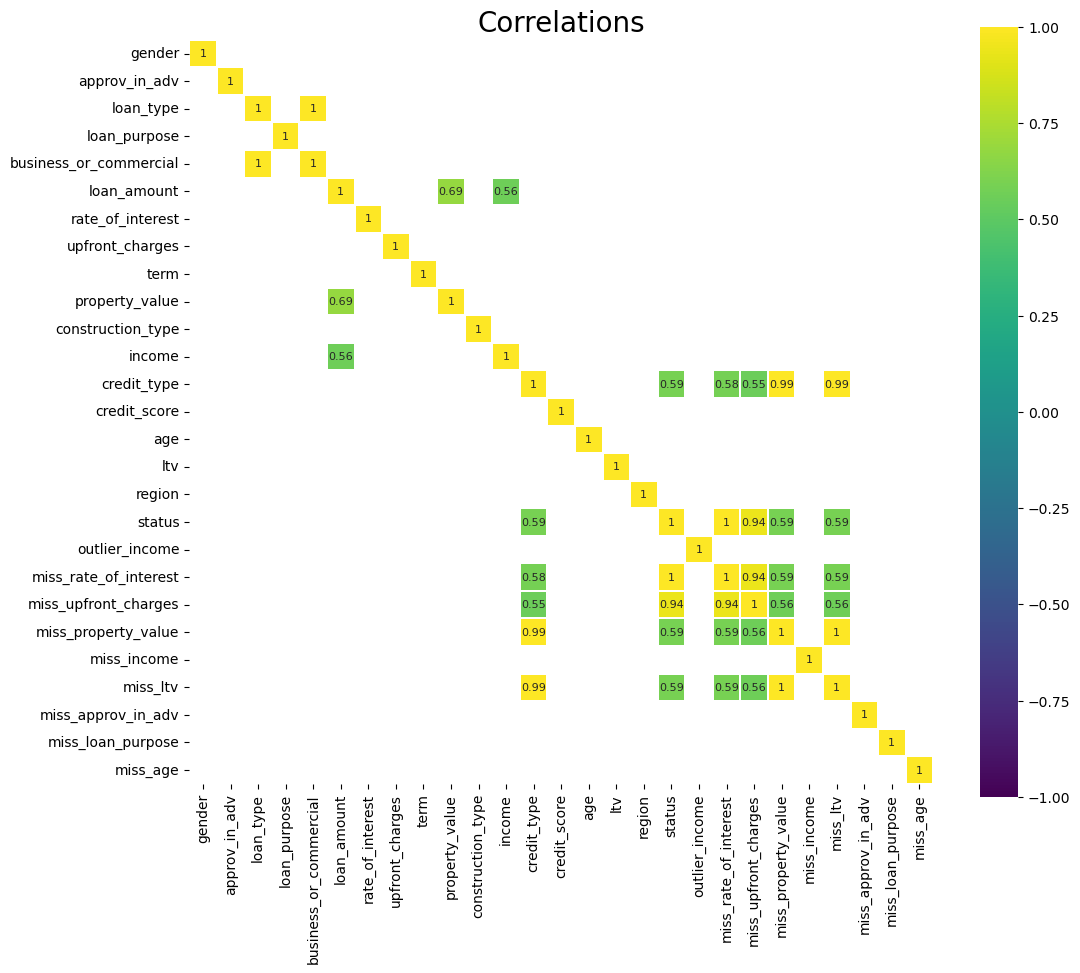

In [55]:
plot_heatmap(corr_matrix[(corr_matrix >= 0.5) | (corr_matrix <= -0.5)], "Correlations")

Em ciência de dados, especialmente quando trabalhamos com conjuntos de dados contendo múltiplas variáveis, o heatmap (mapa de calor) é uma representação visual que destaca a intensidade de uma matriz de dados, atribuindo cores diferentes a diferentes valores. É uma maneira eficaz de visualizar padrões e relações em grandes conjuntos de dados, especialmente em análises exploratórias.

Para entender como o heatmap é usado no contexto da correlação de Pearson, imagine que você tenha um conjunto de dados com várias variáveis e deseje visualizar as correlações entre todas essas variáveis. O heatmap pode ser utilizado para representar a matriz de correlação, onde cada célula na matriz representa a correlação entre duas variáveis.

A representação visual geralmente atribui cores mais claras para valores próximos a 1 (correlação positiva forte), cores mais escuras para valores próximos a -1 (correlação negativa forte), e uma cor neutra (como o branco) para valores próximos a 0 (correlação fraca ou ausente). Dessa forma, padrões e relações podem ser facilmente identificados.

A correlação de Pearson é uma medida estatística que quantifica a relação linear entre duas variáveis contínuas. Ela varia de -1 a 1, onde:

1 indica uma correlação positiva perfeita: à medida que uma variável aumenta, a outra também aumenta em proporção constante.
-1 indica uma correlação negativa perfeita: à medida que uma variável aumenta, a outra diminui em proporção constante.
0 indica ausência de correlação linear: as variáveis não têm uma relação linear.

A correlação de Pearson é sensível apenas a relações lineares. Portanto, se a relação entre as variáveis não for linear, o coeficiente de correlação pode não capturar a verdadeira natureza da associação.

Essa medida é comumente utilizada em análises estatísticas e em ciência de dados para avaliar a força e direção da relação linear entre variáveis.

## Caso particular

In [56]:
corr2 = nominal.associations(df1[['loan_amount', 'income']], compute_only = True, num_num_assoc='spearman')

In [57]:
corr2['corr']

loan_amount    income
loan_amount     1.000000  0.624077
income          0.624077  1.000000

# Pandas - exemplos extra

#### Merge entre duas bases de dados

In [58]:
df.reset_index(inplace=True)

In [59]:
df.head(1)

index             gender approv_in_adv loan_type loan_purpose  \
0      0  Sex Not Available         nopre     type1           p1   

  business_or_commercial  loan_amount  rate_of_interest  upfront_charges  \
0                  nob/c       116500               NaN              NaN   

    term  property_value construction_type  income credit_type  credit_score  \
0  360.0        118000.0                sb  1740.0         EXP           758   

     age        ltv region status  
0  25-34  98.728814  south      1

In [60]:
df_ficticia = df.copy()

In [61]:
df_ficticia = df_ficticia[['index']]

In [62]:
df_ficticia['col_random'] = np.random.randint(0, 2, len(df_ficticia))

In [63]:
df_ficticia.head()

index  col_random
0      0           0
1      1           1
2      2           0
3      3           1
4      4           0

In [64]:
df_ficticia['gender'] = np.random.randint(0, 2, len(df_ficticia))

In [65]:
df.rename(columns={'index':'index2'}, inplace=True)

In [66]:
df_merge = df.merge(df_ficticia, how='inner', left_on='index2', right_on='index', suffixes=('_left', '_right'))

In [67]:
df_merge.head()

index2        gender_left approv_in_adv loan_type loan_purpose  \
0       0  Sex Not Available         nopre     type1           p1   
1       1               Male         nopre     type2           p1   
2       2               Male           pre     type1           p1   
3       3               Male         nopre     type1           p4   
4       4              Joint           pre     type1           p1   

  business_or_commercial  loan_amount  rate_of_interest  upfront_charges  \
0                  nob/c       116500               NaN              NaN   
1                    b/c       206500               NaN              NaN   
2                  nob/c       406500              4.56            595.0   
3                  nob/c       456500              4.25              NaN   
4                  nob/c       696500              4.00              0.0   

    term  property_value construction_type   income credit_type  credit_score  \
0  360.0        118000.0                sb   1740.0         EXP           758   
1  360.0             NaN                sb   4980.0        EQUI           552   
2  360.0        508000.0                sb   9480.0         EXP           834   
3  360.0        658000.0                sb  11880.0         EXP           587   
4  360.0        758000.0                sb  10440.0        CRIF           602   

     age        ltv region status  index  col_random  gender_right  
0  25-34  98.728814  south      1      0           0             1  
1  55-64        NaN  North      1      1           1             0  
2  35-44  80.019685  south      0      2           0             1  
3  45-54  69.376900  North      0      3           1             1  
4  25-34  91.886544  North      0      4           0             1

#### Distribuição das categorias de uma variável categórica

In [68]:
df.age.unique()

array(['25-34', '55-64', '35-44', '45-54', '65-74', '>74', '<25', nan],
      dtype=object)

In [69]:
df.age.value_counts(dropna=False, normalize=True)*100

45-54    23.353736
35-44    22.074393
55-64    21.883366
65-74    13.953050
25-34    12.875496
>74       4.826125
<25       0.899307
NaN       0.134526
Name: age, dtype: float64

#### groupby 

In [70]:
gb = df.groupby('age').loan_amount.mean().sort_values().reset_index()

In [71]:
gb.columns = ['age', 'loan_amount_mean']

In [72]:
gb

age  loan_amount_mean
0    <25     250695.961107
1    >74     260732.752613
2  65-74     269091.592750
3  55-64     305933.515707
4  45-54     352737.327189
5  25-34     357481.088705
6  35-44     376490.553964

#### crosstab

Essa função é usada para calcular tabelas de contingência, que são tabelas que mostram a distribuição conjunta de duas ou mais variáveis categóricas. Ela é especialmente útil quando você está trabalhando com dados que têm categorias e deseja entender a relação entre essas categorias.

In [73]:
pd.crosstab(df.age, df.gender)

gender  Female  Joint   Male  Sex Not Available
age                                            
25-34     3016   5797   6762               3567
35-44     5354   9713  10362               7389
45-54     6494   9463  10133               8630
55-64     6581   8385   8374               9194
65-74     4160   5811   4541               6232
<25        237    294    570                236
>74       1424   1936   1604               2211

#### pivot_table

utilizada para criar tabelas dinâmicas (pivot tables) a partir de um DataFrame. As tabelas dinâmicas são uma forma poderosa de resumir e analisar dados, permitindo que você reorganize e agregue informações de acordo com diferentes critérios.

In [74]:
pv = pd.pivot_table(df, 'loan_amount', 'age', 'gender', 'sum', fill_value=0)

In [75]:
pv

gender      Female       Joint        Male  Sex Not Available
age                                                          
25-34    983264000  2432580500  2355813000         1071245500
35-44   1826671000  4280374500  3807933000         2440688500
45-54   2070891000  3883899500  3553644500         2738605000
55-64   1802386500  3023242500  2549321000         2578291000
65-74    991500000  1799511500  1211996500         1579028000
<25       56030500    87061000   139035000           53054000
>74      336216000   580454000   416606000          537481500

#### lambda x

In [76]:
pv.apply(lambda x: x/x.sum().sum())*100

gender     Female      Joint       Male  Sex Not Available
age                                                       
25-34   12.188781  15.121289  16.786051           9.740018
35-44   22.643861  26.607457  27.132951          22.191318
45-54   25.671272  24.142908  25.321050          24.900046
55-64   22.342825  18.792934  18.164868          23.442433
65-74   12.290877  11.186036   8.635930          14.356897
<25      0.694568   0.541184   0.990677           0.482380
>74      4.167816   3.608190   2.968474           4.886909

#### Guardar bases dados em formato zip

In [77]:
#df.to_excel('data/df_excel.xlsx', index=False)

In [78]:
#df.to_csv('data/df_zip.gzip', index=False, compression='gzip')

# próximos passos

Esta área está em constante desenvolvimento portanto se quiserem evoluir rápido aconselho explorarem:
- towardsdatascience;
- analyticsvidhya;
- Medium;
- Kaggle;
- stackoverflow